In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [42]:
df = pd.read_csv("cdc_clean_carefully_dropped_missing.csv")
df.head()

,cnty_fips,county,state,cardiac_intensive_care_units,cardiac_rehab_eligibility,cardiac_rehab_sessions,cardiac_rehab_particpation,cardiac_rehab_units,cholesterol_screen,cholesterol_medication,no_of_emergency_centers,no_of_hospitals,insurance_status,neuro_services_avail,no_of_pharmacies,no_of_primary_physicians,total_healthcare_cost_per_capita,prevalence,diagnosed_diabetes,cholesterol_awareness,leisure_inactivity,obesity,smoking,air_quality,population_age_65_plus,population_indians,population_asian,population_black,population_hispanic,population_total,population_white,income_inequality,median_houshld_income,park_access,poverty_rate,unemployment_rate,urban_rural_class
0,2020,Anchorage,AK,1.0,13.5,23.6,24.3,1.0,72.5,18.7,5.1,4.0,12.1,2.0,5.1,0.9,16889,5.1,8.6,32.1,17.0,30.1,17.3,6.400,10.5,7.3,11.8,5.2,9.1,293531.0,57.9,0.430,0.430,83.0,9.5,4.4,3.0
1,2090,Fairbanks North Star,AK,1.0,13.0,29.6,33.6,1.0,70.8,17.1,7.1,2.0,12.3,0.0,7.1,1.2,12996,4.8,7.9,31.6,18.6,31.1,17.5,13.900,9.8,7.2,3.6,4.2,8.0,99072.0,69.9,0.409,0.409,36.0,7.2,4.7,3.0
2,2122,Kenai Peninsula,AK,0.0,15.3,25.7,33.6,1.0,75.4,18.8,6.8,3.0,15.5,1.0,6.8,1.3,18183,7.4,8.1,35.1,19.9,32.9,20.8,8.125,16.5,7.7,1.9,0.5,4.1,58464.0,79.9,0.439,0.439,52.0,10.4,6.0,4.0
3,2170,Matanuska-Susitna,AK,0.0,15.3,24.1,22.7,0.0,72.3,17.6,0.0,1.0,15.1,0.0,0.0,2.0,17259,5.9,8.6,32.3,19.8,34.3,20.5,5.700,11.3,6.0,1.5,1.1,4.9,105369.0,79.2,0.422,0.422,26.0,9.6,6.1,3.0
4,6001,Alameda,CA,3.0,10.6,26.2,23.6,6.0,80.8,13.8,8.8,12.0,5.0,7.0,8.8,0.9,20204,4.7,6.7,28.4,14.5,22.0,11.3,8.700,13.5,0.3,30.0,10.3,22.3,1656754.0,31.4,0.462,0.462,84.0,8.9,3.0,1.0


In [43]:
df.drop(columns = ["cnty_fips"], inplace = True)

In [44]:
df.dtypes

county                               object
state                                object
cardiac_intensive_care_units        float64
cardiac_rehab_eligibility           float64
cardiac_rehab_sessions              float64
cardiac_rehab_particpation          float64
cardiac_rehab_units                 float64
cholesterol_screen                  float64
cholesterol_medication              float64
no_of_emergency_centers             float64
no_of_hospitals                     float64
insurance_status                    float64
neuro_services_avail                float64
no_of_pharmacies                    float64
no_of_primary_physicians            float64
total_healthcare_cost_per_capita      int64
prevalence                          float64
diagnosed_diabetes                  float64
cholesterol_awareness               float64
leisure_inactivity                  float64
obesity                             float64
smoking                             float64
air_quality                     

In [45]:
pd.set_option('display.max_columns', 50)

#### Let's see the distribution of these variables

In [46]:
df.describe()

,cardiac_intensive_care_units,cardiac_rehab_eligibility,cardiac_rehab_sessions,cardiac_rehab_particpation,cardiac_rehab_units,cholesterol_screen,cholesterol_medication,no_of_emergency_centers,no_of_hospitals,insurance_status,neuro_services_avail,no_of_pharmacies,no_of_primary_physicians,total_healthcare_cost_per_capita,prevalence,diagnosed_diabetes,cholesterol_awareness,leisure_inactivity,obesity,smoking,air_quality,population_age_65_plus,population_indians,population_asian,population_black,population_hispanic,population_total,population_white,income_inequality,median_houshld_income,park_access,poverty_rate,unemployment_rate,urban_rural_class
count,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,0.438095,17.168918,24.616840,34.218615,0.981818,79.856537,15.530563,12.041472,1.735498,10.632641,0.838961,12.041472,2.490130,19468.945455,8.279524,10.382554,36.738831,25.020303,33.489221,19.748874,7.856504,18.478615,1.168139,1.591342,8.222944,7.910087,1.322281e+05,78.632944,0.443936,0.443936,26.330736,13.370260,3.809264,3.344589
std,1.229183,4.748979,4.779962,16.275084,1.474665,2.998983,2.894919,9.522688,2.874553,4.541964,2.018976,9.522688,2.083428,2226.215413,1.657266,3.197209,3.442488,5.512959,5.422442,3.644148,1.582564,4.389593,4.600205,2.847897,12.648454,10.551942,3.201644e+05,18.166093,0.032838,0.032838,22.012412,4.854305,1.180615,0.831313
min,0.000000,6.300000,2.000000,1.200000,0.000000,60.300000,9.600000,0.000000,0.000000,2.400000,0.000000,0.000000,0.200000,12283.000000,3.800000,2.200000,23.900000,8.800000,11.000000,6.900000,1.800000,6.600000,0.000000,0.000000,0.000000,0.000000,1.564000e+03,3.500000,0.343000,0.343000,0.000000,2.700000,1.500000,1.000000
25%,0.000000,13.900000,21.900000,22.200000,0.000000,78.200000,13.500000,5.400000,1.000000,7.100000,0.000000,5.400000,1.300000,17905.250000,7.100000,8.100000,34.500000,21.200000,30.100000,17.300000,6.900000,15.700000,0.100000,0.400000,0.700000,2.300000,1.865600e+04,69.025000,0.421000,0.421000,9.000000,9.900000,3.000000,3.000000
50%,0.000000,16.400000,25.200000,32.300000,1.000000,80.000000,15.300000,11.900000,1.000000,9.700000,0.000000,11.900000,1.900000,19306.000000,8.300000,9.900000,37.100000,24.700000,33.800000,19.600000,8.100000,18.200000,0.200000,0.700000,2.500000,4.200000,3.953550e+04,84.900000,0.442000,0.442000,20.000000,12.700000,3.600000,4.000000
75%,0.000000,19.800000,27.800000,43.700000,1.000000,81.800000,17.200000,17.300000,2.000000,13.400000,1.000000,17.300000,2.800000,20757.500000,9.400000,12.200000,39.200000,28.700000,37.200000,22.275000,8.900000,20.700000,0.500000,1.600000,9.600000,8.675000,1.033755e+05,92.500000,0.465750,0.465750,38.750000,16.100000,4.400000,4.000000
max,28.000000,51.200000,40.000000,99.800000,26.000000,90.100000,38.200000,63.700000,78.000000,32.100000,46.000000,63.700000,28.500000,30632.000000,14.500000,28.700000,46.000000,44.400000,53.500000,32.600000,16.000000,56.700000,79.200000,42.600000,78.300000,95.400000,5.198275e+06,262.000000,0.601000,0.601000,100.000000,36.600000,16.800000,4.000000


In [47]:
df.shape

(2310, 36)

#### Check correlation between all the variables

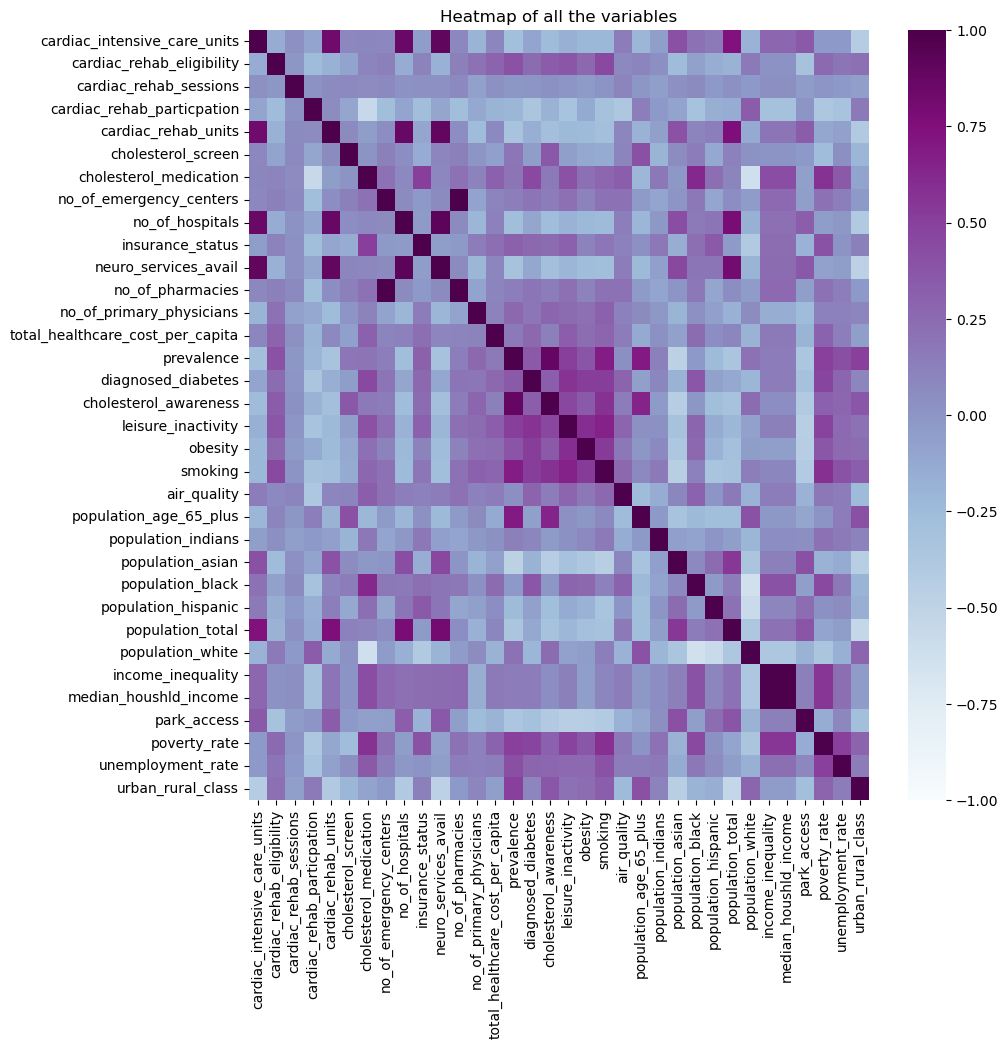

In [62]:
plt.rcParams["figure.figsize"] = (10,10);

corr_mat_full = df.corr()
ax = sns.heatmap(corr_mat_full, cmap="BuPu", vmin=-1, annot = False);
ax.set_title("Heatmap of all the variables");


plt.show()

plt.tight_layout();
plt.rcdefaults();


**Let's extract the correlation of all the variables with prevalence**

**Positive correlations**

In [49]:
corr_values = corr_mat_full.loc["prevalence"].to_frame().sort_values("prevalence", ascending = False)
round(corr_values["prevalence"][corr_values["prevalence"] > 0]*100, 2)

prevalence                          100.00
cholesterol_awareness                87.72
population_age_65_plus               68.92
smoking                              67.67
leisure_inactivity                   51.25
urban_rural_class                    50.16
poverty_rate                         50.05
unemployment_rate                    41.43
cardiac_rehab_eligibility            40.40
obesity                              37.78
diagnosed_diabetes                   35.78
insurance_status                     31.16
no_of_primary_physicians             26.60
population_white                     21.10
cholesterol_medication               20.00
cholesterol_screen                   18.53
total_healthcare_cost_per_capita     16.00
median_houshld_income                15.32
income_inequality                    15.32
no_of_pharmacies                     14.00
no_of_emergency_centers              14.00
population_indians                   12.80
air_quality                           4.19
Name: preva

**Negative correlations**

In [50]:
corr_values = corr_mat_full.loc["prevalence"].to_frame().sort_values("prevalence", ascending = True)
round(corr_values["prevalence"][corr_values["prevalence"] < 0]*100, 2)

population_asian               -48.23
park_access                    -35.84
population_total               -34.75
cardiac_rehab_units            -32.12
neuro_services_avail           -31.77
cardiac_intensive_care_units   -27.83
no_of_hospitals                -27.31
population_hispanic            -24.64
cardiac_rehab_particpation     -20.65
population_black                -2.13
cardiac_rehab_sessions          -0.45
Name: prevalence, dtype: float64

#### Inspecting correlation between prevalence and the risk factors

The risk factors are represneted by the following varaiables: 
"cholesterol_awareness", "diagnosed_diabetes", "obesity", "leisure_inactivity", "smoking"

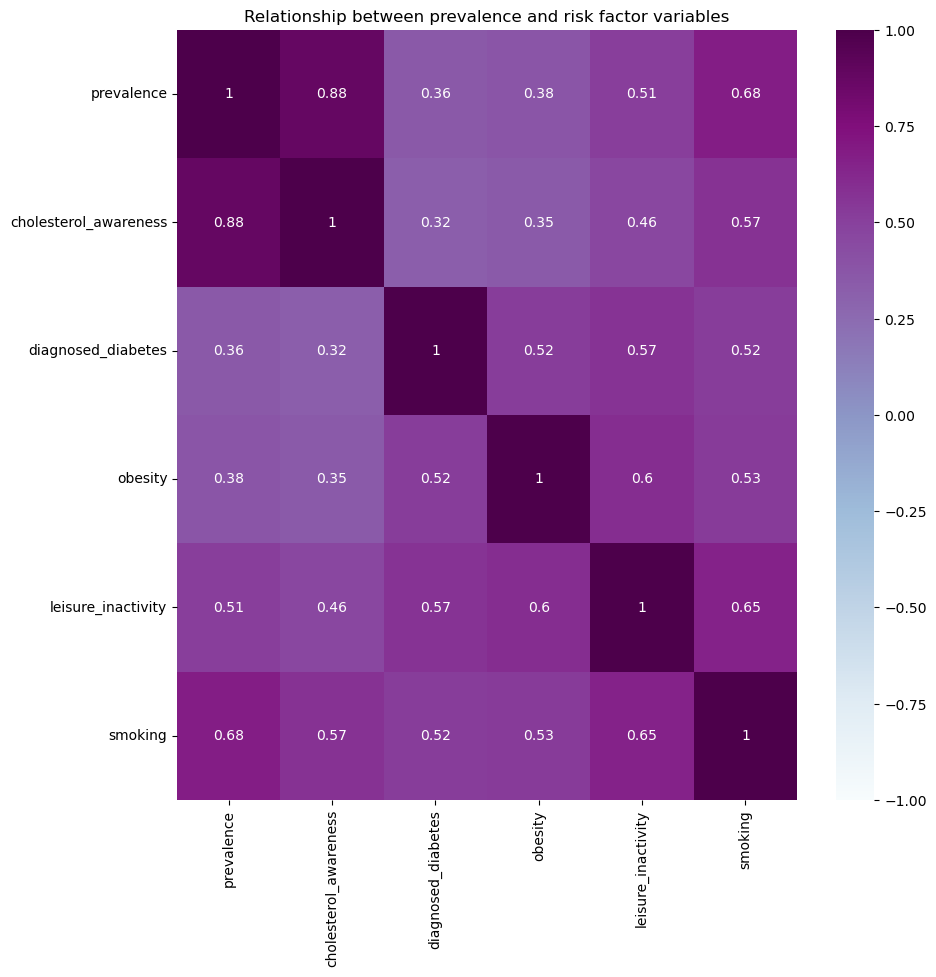

In [63]:
plt.rcdefaults();

corr_mat1 = df[["prevalence","cholesterol_awareness", "diagnosed_diabetes", "obesity", "leisure_inactivity", "smoking"]].corr()
ax = sns.heatmap(corr_mat1, cmap="BuPu", vmin = -1, annot = True);
ax.set_title("Relationship between prevalence and risk factor variables");
plt.show()

In [52]:
corrs = corr_mat1.loc["prevalence"].to_frame().sort_values("prevalence", ascending = False)
corrs

,prevalence
prevalence,1.000000
cholesterol_awareness,0.877170
smoking,0.676678
leisure_inactivity,0.512535
obesity,0.377841
diagnosed_diabetes,0.357811


How statistically significant are these correlations?

In [53]:
for variable in corrs.index:
    pearson_coef, p_value = stats.pearsonr(df[variable], df['prevalence'])
    corrs["p_value"] = p_value
    #print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
corrs["significance"] = corrs["p_value"] < 0.05
corrs

,prevalence,p_value,significance
prevalence,1.000000,1.011569e-70,True
cholesterol_awareness,0.877170,1.011569e-70,True
smoking,0.676678,1.011569e-70,True
leisure_inactivity,0.512535,1.011569e-70,True
obesity,0.377841,1.011569e-70,True
diagnosed_diabetes,0.357811,1.011569e-70,True


Since all the variables have p-value less than 0.05, their correlations with prevalence have strong statistical significance

How about visualizing these correlations with scatterplots

In [54]:
# dfx = df[["prevalence","cholesterol_awareness", "diagnosed_diabetes", "obesity", "leisure_inactivity", "smoking"]]
# sns.pairplot(dfx)

**Summary** 

Looking at all the risk factors, the following are the varaiables of interest.

1. cholesterol_awareness
2. smoking
3. leisure_inactivity
4. obesity
5. diagnosed_diabetes

#### Inspecting correlation between prevalence and the healthcare opportunities.

The healthcare opportunities are represented by the following variables:
"cholesterol_medication", "cholesterol_screen", "cardiac_rehab_eligibility", "cardiac_rehab_sessions", "cardiac_rehab_particpation", "cardiac_rehab_units", "insurance_status"
"no_of_emergency_centers", "no_of_hospitals", "neuro_services_avail", "no_of_pharmacies", "no_of_primary_physicians"

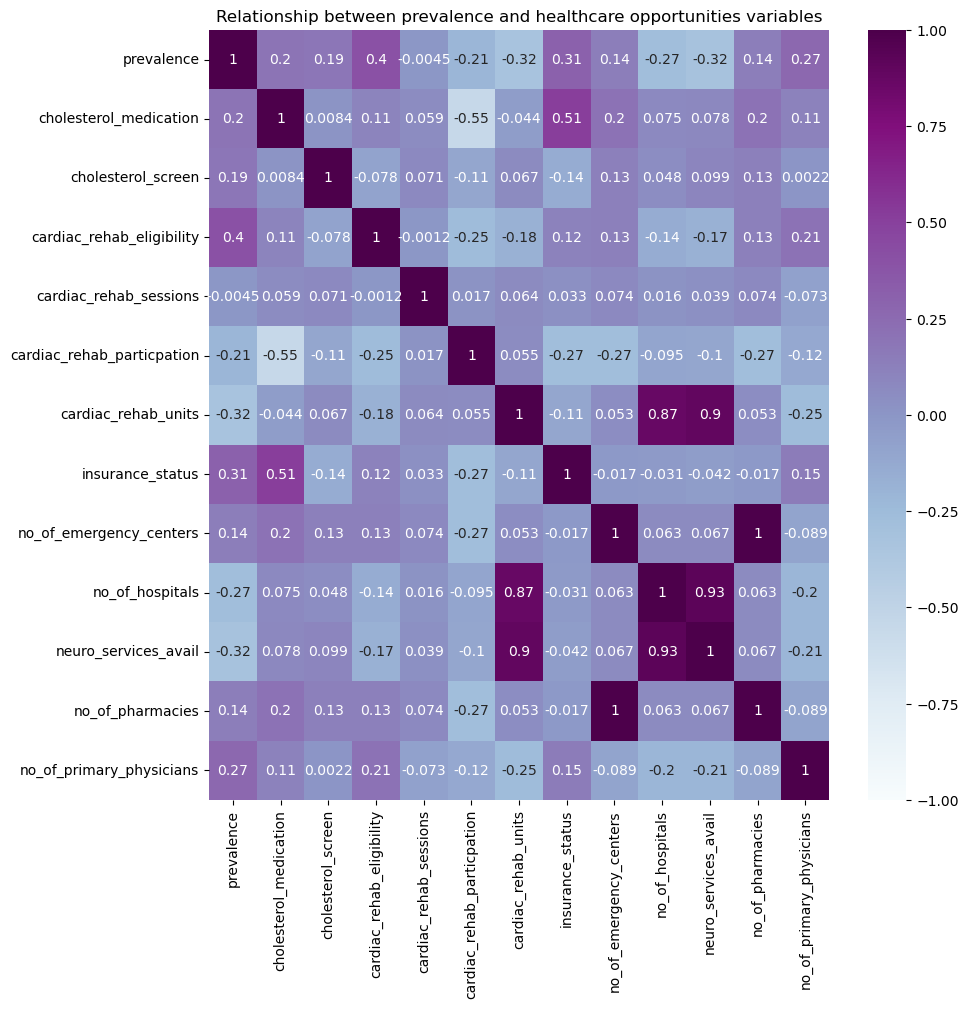

In [64]:
plt.rcParams["figure.figsize"] = (10,10);


corr_mat2 = df[["prevalence", "cholesterol_medication", "cholesterol_screen", "cardiac_rehab_eligibility", "cardiac_rehab_sessions", "cardiac_rehab_particpation", "cardiac_rehab_units", "insurance_status", "no_of_emergency_centers", "no_of_hospitals", "neuro_services_avail", "no_of_pharmacies", "no_of_primary_physicians"]].corr()
ax = sns.heatmap(corr_mat2, cmap="BuPu", vmin = -1, annot = True);
ax.set_title("Relationship between prevalence and healthcare opportunities variables");
plt.show()


plt.rcdefaults();

In [65]:
corrs = corr_mat2.loc["prevalence"].to_frame().sort_values("prevalence", ascending = False)
corrs

,prevalence
prevalence,1.000000
cardiac_rehab_eligibility,0.403965
insurance_status,0.311594
no_of_primary_physicians,0.265981
cholesterol_medication,0.199996
cholesterol_screen,0.185265
no_of_emergency_centers,0.139953
no_of_pharmacies,0.139953
cardiac_rehab_sessions,-0.004531
cardiac_rehab_particpation,-0.206498


How statistically significant are these correlations?

In [66]:
for variable in corrs.index:
    pearson_coef, p_value = stats.pearsonr(df[variable], df['prevalence'])
    corrs["p_value"] = p_value
    #print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

corrs["significance"] = corrs["p_value"] < 0.05
corrs

,prevalence,p_value,significance
prevalence,1.000000,1.353197e-56,True
cardiac_rehab_eligibility,0.403965,1.353197e-56,True
insurance_status,0.311594,1.353197e-56,True
no_of_primary_physicians,0.265981,1.353197e-56,True
cholesterol_medication,0.199996,1.353197e-56,True
cholesterol_screen,0.185265,1.353197e-56,True
no_of_emergency_centers,0.139953,1.353197e-56,True
no_of_pharmacies,0.139953,1.353197e-56,True
cardiac_rehab_sessions,-0.004531,1.353197e-56,True
cardiac_rehab_particpation,-0.206498,1.353197e-56,True


Since all the variables have p-value less than 0.05, their correlations with prevalence is have strong statistical significance

How about visualizing these correlations with scatterplots

In [67]:
plt.rcdefaults();

**summary**

Looking at all the healthcare opportunities factors, the following are the varaiables of interest.

1. cardiac_rehab_eligibility
2. cholesterol_medication
3. cholesterol_screen
4. cardiac_rehab_sessions
5. cardiac_rehab_participation
6. cardiac_rehab_units




**void**

insurance_status, cholesterol_medication. cholesterol_screening, and cardiac_rehab_eligibility all show positive realtionship with the prevalance. In our study, we do not interpret this to mean that these variables truly increase prevalence since they are supposed to be preventative factors which can reduce prevalence. Instead, we interpret this to mean that, the more people have access to the services represented by these variables, the more educated they are about heart diseases and the easier it is for heart diseases to be detected and treated. Having these factors in our model may not accurately model will imply that these factors increase, the prevalence increases and so they should be discouraged. This will be wrong because they are good prgrams that should be encourged.  

neuro_services do really to heart diseases but not as much as cardio-services. 





#### Inspecting correlation between prevalence and the socioeconomic factors and healthcare cost.

The socioeconomic factors are represented by the following variables:

'air_quality', 'population_age_65+', 'population_indians', 'population_asian', 'population_black', 'population_hispanic', 
'population_total', 'population_white', 'income_inequality', 'median_houshld_income','park_access', 'poverty_rate',
'unemployment_rate', 'urban_rural_class', 'total_healthcare_cost_per_capita'

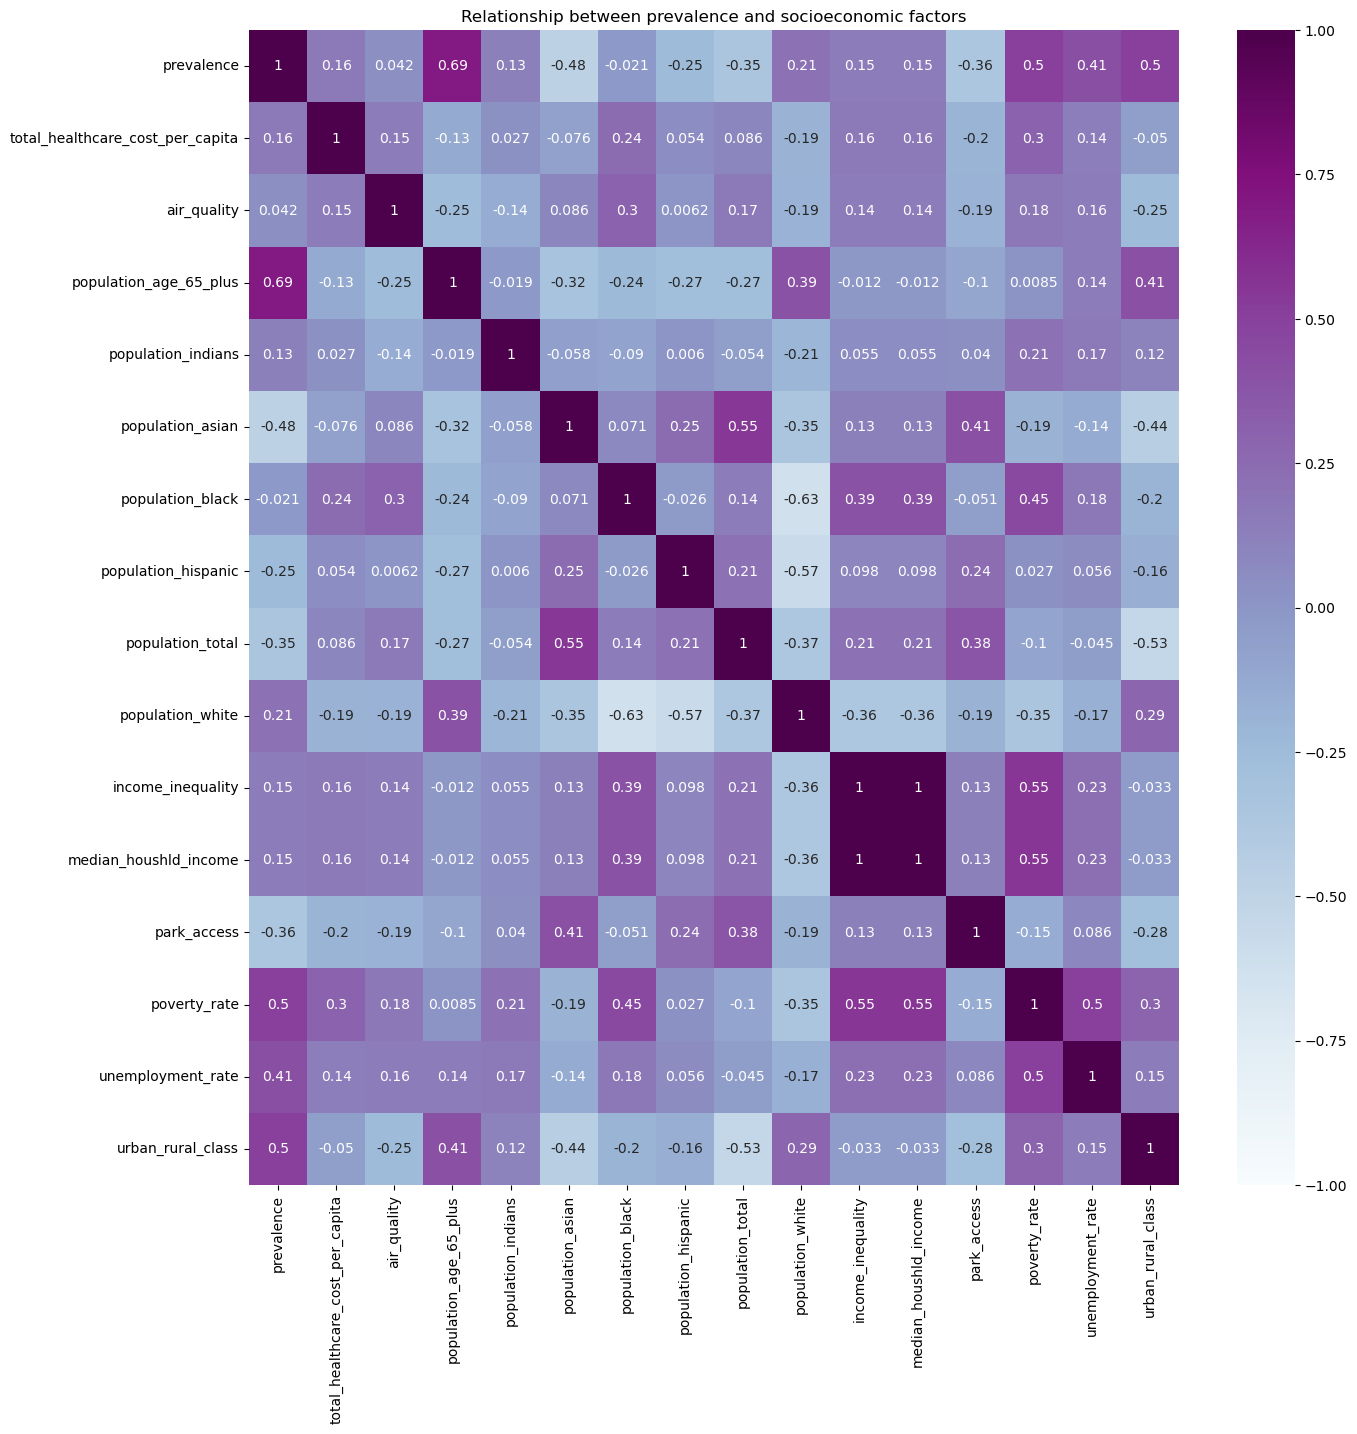

In [69]:
plt.rcParams["figure.figsize"] = (15,15);

corr_mat3 = df[['prevalence', 'total_healthcare_cost_per_capita', 'air_quality', 'population_age_65_plus', 'population_indians', 'population_asian', 'population_black', 
               'population_hispanic', 'population_total', 'population_white', 'income_inequality', 'median_houshld_income',
               'park_access', 'poverty_rate', 'unemployment_rate', 'urban_rural_class']].corr()
ax = sns.heatmap(corr_mat3, cmap="BuPu", vmin = -1, annot = True);
ax.set_title("Relationship between prevalence and socioeconomic factors");

plt.show()

plt.rcdefaults()

In [70]:
corrs = corr_mat3.loc["prevalence"].to_frame().sort_values("prevalence", ascending = False)
corrs

,prevalence
prevalence,1.000000
population_age_65_plus,0.689180
urban_rural_class,0.501646
poverty_rate,0.500473
unemployment_rate,0.414303
population_white,0.211037
total_healthcare_cost_per_capita,0.160032
income_inequality,0.153208
median_houshld_income,0.153208
population_indians,0.127955


How statistically significant are these variables:

In [71]:
for variable in corrs.index:
    pearson_coef, p_value = stats.pearsonr(df[variable], df['prevalence'])
    corrs["p_value"] = p_value
    #print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
corrs["significance"] = corrs["p_value"] < 0.05
corrs

,prevalence,p_value,significance
prevalence,1.000000,7.037944e-135,True
population_age_65_plus,0.689180,7.037944e-135,True
urban_rural_class,0.501646,7.037944e-135,True
poverty_rate,0.500473,7.037944e-135,True
unemployment_rate,0.414303,7.037944e-135,True
population_white,0.211037,7.037944e-135,True
total_healthcare_cost_per_capita,0.160032,7.037944e-135,True
income_inequality,0.153208,7.037944e-135,True
median_houshld_income,0.153208,7.037944e-135,True
population_indians,0.127955,7.037944e-135,True


Since all the variables have p-value less than 0.05, their correlations with prevalence is have strong statistical significance

How about visualizing these correlations with scatterplots

In [72]:
plt.rcdefaults();

**Relationship urban_rural classification and prevalence** 

First, we convert the urban_rural class to categorical to investigate the relationship between each class and prevalence

In [78]:
#### Convert "urban-rural-class" to categorical and get dummy variables
df1 = df.copy()

df1["urban_rural_class"] = df1["urban_rural_class"].astype('category')
df1["urban_rural_class"].unique()

dummy_variable_1 = pd.get_dummies(df1["urban_rural_class"])

dummy_variable_1.rename(columns={1.0:'large_central_metro', 2.0:'large_fringe_metro', 3.0:'small_metro', 4.0:'nonmetro'}, inplace=True)
dummy_variable_1.head()

# merge data frame "df" and "dummy_variable_1" 
df1 = pd.concat([df1, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df1.drop("urban_rural_class", axis = 1, inplace=True)
df1.columns

Index(['county', 'state', 'cardiac_intensive_care_units',
       'cardiac_rehab_eligibility', 'cardiac_rehab_sessions',
       'cardiac_rehab_particpation', 'cardiac_rehab_units',
       'cholesterol_screen', 'cholesterol_medication',
       'no_of_emergency_centers', 'no_of_hospitals', 'insurance_status',
       'neuro_services_avail', 'no_of_pharmacies', 'no_of_primary_physicians',
       'total_healthcare_cost_per_capita', 'prevalence', 'diagnosed_diabetes',
       'cholesterol_awareness', 'leisure_inactivity', 'obesity', 'smoking',
       'air_quality', 'population_age_65_plus', 'population_indians',
       'population_asian', 'population_black', 'population_hispanic',
       'population_total', 'population_white', 'income_inequality',
       'median_houshld_income', 'park_access', 'poverty_rate',
       'unemployment_rate', 'large_central_metro', 'large_fringe_metro',
       'small_metro', 'nonmetro'],
      dtype='object')

The table above suggest that there is a tendency for heart diseases to be prevalent in nonmetro areas, while the reverse is the case for metro areas. Perhaps, this may due to decrease activities in nonmetro area which can translate into leisure inactivity, and vice-versa for metro areas. However, investigation of the relationship between nonmetro, metro areas and leisure_inactivity, as shown below, iondicates that this can be true. Similar observations can be made of park_access except that the behavior is opposite to leisure_inactivity as one would have expected.

In [80]:
corr_mat5 = df1.corr()

In [81]:
round(corr_mat5["leisure_inactivity"]["nonmetro"]*100, 2)

19.56

In [82]:
round(corr_mat5["leisure_inactivity"]["large_fringe_metro"]*100, 2)

-11.82

In [83]:
round(corr_mat5["leisure_inactivity"]["large_central_metro"]*100, 2)

-12.4

In [84]:
round(corr_mat5["park_access"]["nonmetro"]*100, 2)

-21.7

In [85]:
round(corr_mat5["park_access"]["large_fringe_metro"]*100, 2)

4.23

In [86]:
round(corr_mat5["park_access"]["large_central_metro"]*100, 2)

31.68

**Relationship between population groups and prevalence**

There is a positive correlation between population_age_65_plus and prevalence as onewould have expected. However, surprisingly, the relationship between population_total and prevalence is negative, suggesting that the more the population, the lower the prevalent of heart disease. Both varaiables capture constrasting effect of population (demographics). As such, we will let our model reflect the both variables.

In [91]:
dfp = df[["population_total", "population_age_65_plus", "prevalence"]]
dfp["population_total"] = (df["population_total"].astype(float) - min(df["population_total"].astype(float)))/ max(df["population_total"].astype(float))
corrs = dfp.corr()
corrs

<ipython-input-91-9b21499ee5ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp["population_total"] = (df["population_total"].astype(float) - min(df["population_total"].astype(float)))/ max(df["population_total"].astype(float))


,population_total,population_age_65_plus,prevalence
population_total,1.000000,-0.268236,-0.347519
population_age_65_plus,-0.268236,1.000000,0.689180
prevalence,-0.347519,0.689180,1.000000


#### Isolating some of the variables for potenatial correlations amongst them

 Let's check correlation between income_inequality, median_houshld_income, poverty_rate, and unemployment_rate

In [92]:
df[["income_inequality", "median_houshld_income", "poverty_rate", "unemployment_rate", "prevalence"]].corr()

,income_inequality,median_houshld_income,poverty_rate,unemployment_rate,prevalence
income_inequality,1.000000,1.000000,0.547069,0.232055,0.153208
median_houshld_income,1.000000,1.000000,0.547069,0.232055,0.153208
poverty_rate,0.547069,0.547069,1.000000,0.500751,0.500473
unemployment_rate,0.232055,0.232055,0.500751,1.000000,0.414303
prevalence,0.153208,0.153208,0.500473,0.414303,1.000000


income_inequality and median_houshld_income are 100% correlated with each other and that means we can only select one of them. unemployment_rate and povert_rate are fairly correlated but we feel that poverty_rate is a better variable that can be used in our study to communinicate our findings on prevalence of heart disease (i.e. we would like to see how the prevalence in low income and poor regions compare with prevalence". Furthermore, of all these four variables, poverty_rate correlates best with prevalence and as such is a variable of interest.

#### Variables of Interest

From the correlation analyses and the plots, we are able to deduce that the following variables can potentialy help us answer the problem statement.


**Risk Factors:**

1. cholesterol_awareness
2. diagnosed_diabetes
3. obesity
4. leisure_inactivity
5. smoking

**Healthcare opportunities:**

1. cardiac_rehab_eligibility
2. cholesterol_medication
3. cholesterol_screen
4. cardiac_rehab_sessions
5. cardiac_rehab_participation
6. cardiac_rehab_units

**Socioeconomic Factors:**

1. total_healthcare_cost_per_capita
2. air_quality 
3. park_access
4. population_age_65_plus
5. population_total
6. urban_rural_class
8. median_houshld_income 
9. poverty_rate 

